### 6.5 Unsupervised Machine Learning: Clustering

### Contents:
#### 1.Importing libraries and data and dropping non numerical columns

### 1.Importing libraries and data and dropping non numerical columns

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [5]:
%matplotlib inline

In [6]:
# Define Path
path = r'C:\Users\ankit\Desktop\DataAnalysisCF\DataImmersion\Advanced Analytics & Dashboard Design\World Happiness Analysis'

In [7]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','wh_region.csv'))

In [8]:
df.shape

(1367, 11)

In [9]:
df.head()

,Unnamed: 0,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,region
0,0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Europe
1,1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Europe
2,2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Europe
3,3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Europe
4,4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,North America


In [10]:
df_sub = df.drop(columns = ['Unnamed: 0', 'country', 'region', 'year'])
df_sub

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...
1362,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800
1363,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700
1364,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100
1365,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700


### 2. The elbow technique

In [12]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]
score

[-2288.5099347405794,
 -907.2649106329179,
 -613.9109836078402,
 -471.6276783303624,
 -400.8883582510879,
 -368.18161323273773,
 -343.1056411814257,
 -325.44920670375586,
 -304.5840599456292]

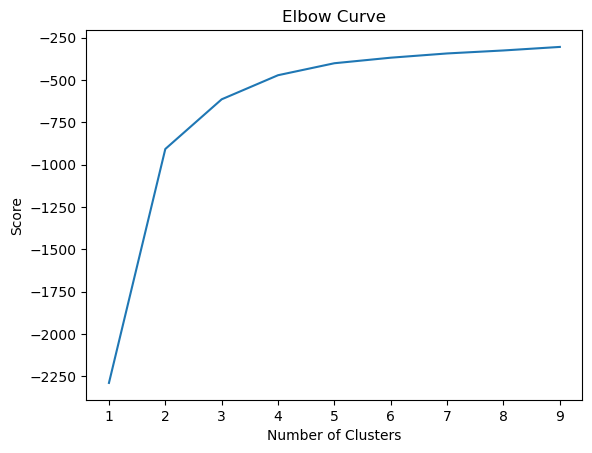

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In this example, there's a jump from three to four on the x-axis,then rises only slightly after four or the curve almost straightens out. This means that the optimal count for your clusters is four.

### 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [18]:
df['clusters'] = kmeans.fit_predict(df_sub)

In [54]:
df.head()
df = df.drop(columns = 'Unnamed: 0')
df

KeyError: "['Unnamed: 0'] not found in axis"

In [56]:
df.to_csv(os.path.join(path,'02 Data','Prepared Data','wh_cluster.csv'))

In [21]:
df['clusters'].value_counts()

clusters
2    467
3    433
1    245
0    222
Name: count, dtype: int64

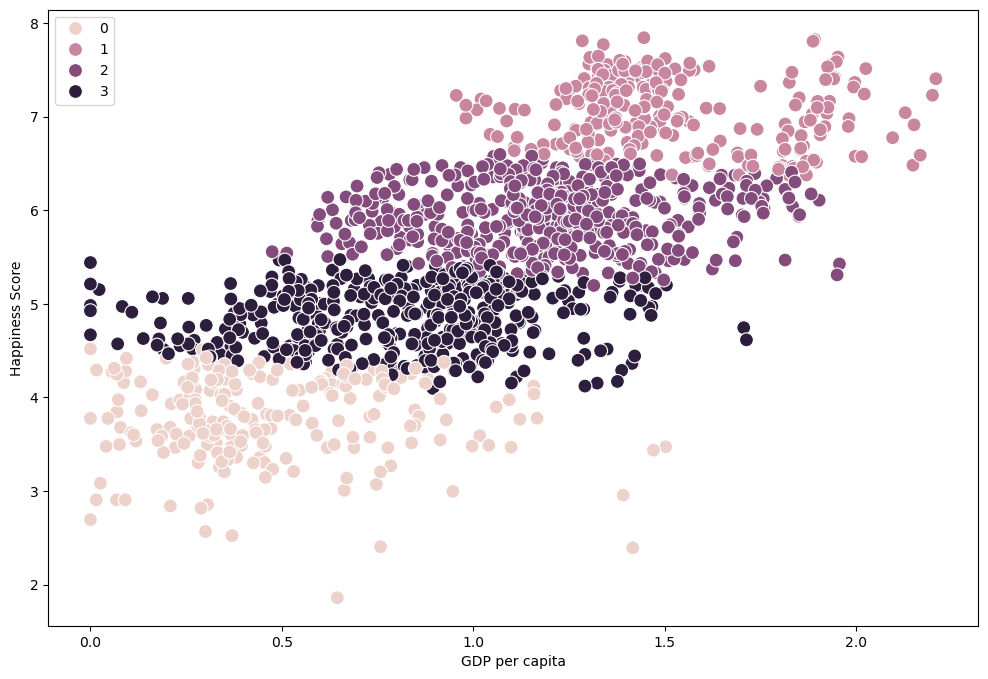

In [22]:
# Plot the clusters for the "Happiness Score" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gdp_per_capita'], y=df['happiness_score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('GDP per capita') 
plt.ylabel('Happiness Score') 
plt.show()

The first cluster, in purple (coded as “2” in the legend), is not very populated. It gathers the data points with low GDP per Capita and less happiness score. The second cluster in light pink (coded as “0” in the legend), is densly populated with data points having low to modarate GDP per Capita and modarate happiness score. The third cluster in dark purple (coded as “3” in the legend), is densly populated with data points having modarate  to high GDP per Capita and high happiness score.The fourth cluster in pink (coded as “1” in the legend), is modarately populated with data points having high GDP per Capita and very high happiness score.

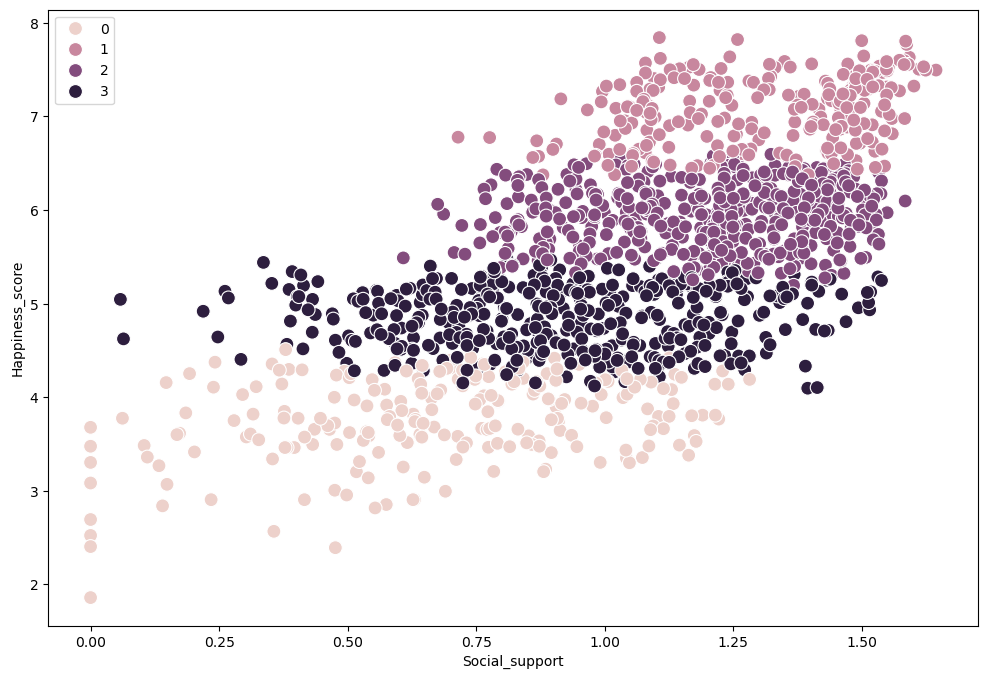

In [24]:
# Plot the clusters for the "Happiness Score" and "Social_support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['social_support'], y=df['happiness_score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Social_support') 
plt.ylabel('Happiness_score') 
plt.show()

The first cluster, in purple (coded as “2” in the legend), is not very populated. It gathers the data points with low  to modarate Social support and less happiness score. The second cluster in light pink (coded as “0” in the legend), is densly populated with data points having low to high Social support and modarate happiness score. The third cluster in dark purple (coded as “3” in the legend), is densly populated with data points having modarate to high Social support and high happiness score.The fourth cluster in pink (coded as “1” in the legend), is modarately populated with data points having high Social support and very high happiness score.

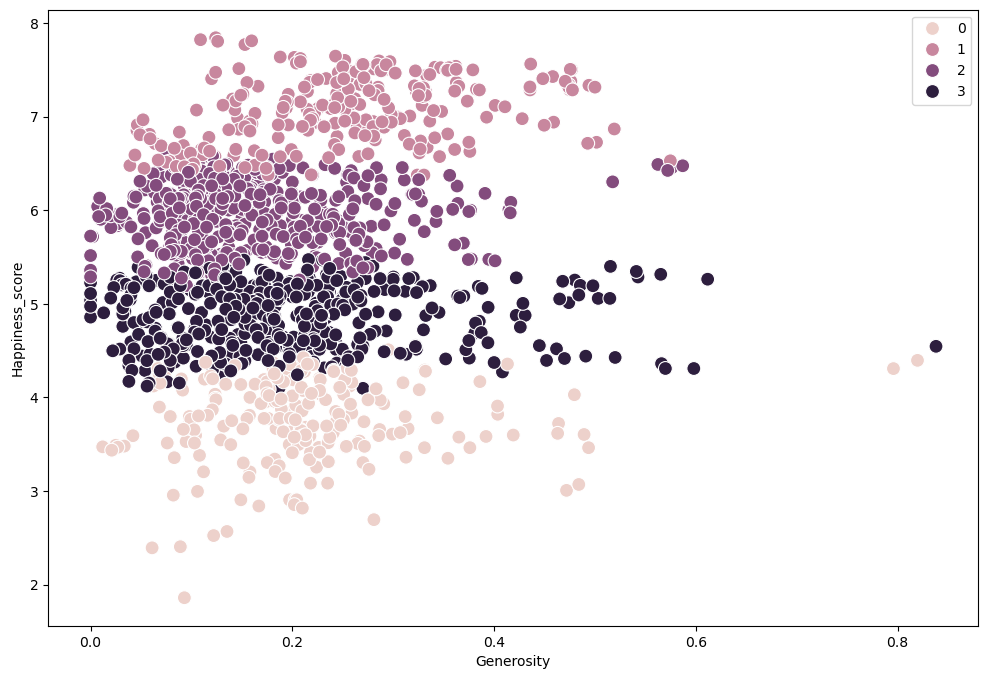

In [26]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['generosity'], y=df['happiness_score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Generosity') 
plt.ylabel('Happiness_score') 
plt.show()

All the four clusters have low , modarate, high and very high happiness score despite of low to modarate generosity. There is no co relation between generosity and happiness score.

In [28]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'


In [29]:
df.groupby('cluster').agg({'happiness_score':['mean', 'median'], 
                         'gdp_per_capita':['mean', 'median'], 
                         'social_support':['mean', 'median'],
                         'healthy_life_expectancy':['mean', 'median'],
                         'freedom_to_make_life_choices':['mean', 'median'],
                         'generosity':['mean', 'median'],
                        'perceptions_of_corruption':['mean', 'median']
                          })

happiness_score         gdp_per_capita          social_support  \
                       mean  median           mean   median           mean   
cluster                                                                      
dark purple        4.846991  4.8760       0.822712  0.88113       0.920193   
light pink         3.764600  3.7875       0.468441  0.38185       0.680439   
pink               7.059146  7.0758       1.521868  1.45038       1.305730   
purple             5.940012  5.9500       1.200137  1.20000       1.198215   

                      healthy_life_expectancy            \
               median                    mean    median   
cluster                                                   
dark purple  0.925580                0.493891  0.522575   
light pink   0.696405                0.291054  0.283275   
pink         1.349510                0.800699  0.810910   
purple       1.226333                0.693249  0.686000   

            freedom_to_make_life_choices           generosity           \
                                    mean    median       mean   median   
cluster                                                                  
dark purple                     0.399848  0.408158   0.194377  0.17922   
light pink                      0.326285  0.355855   0.211699  0.20245   
pink                            0.592858  0.604131   0.250335  0.25100   
purple                          0.482622  0.498000   0.162298  0.14100   

            perceptions_of_corruption           
                                 mean   median  
cluster                                         
dark purple                  0.095296  0.08200  
light pink                   0.114136  0.09357  
pink                         0.275723  0.29000  
purple                       0.099926  0.07857

The pink cluster has the best stats in almost all categories. The median happiness score is 7.07, which is significantly larger than the other three. It also has hightest GDP per Capita, Social Support, healthy life expectency, freedom to make choices, generosity and perceptions_of_corruption. It has the highest mean and median in all aspects. 
From this we can say that countries which are good is all aspects are happy countries with high happiness score and vice versa.